
Chargement des bibliothèques 

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

Chargement du fichier csv

In [52]:
df = pd.read_csv("data/G84 MDSC.csv", delimiter=";") #les colonnes sont délimités par des ;

Aperçu des données

In [53]:
print(df.head())
print(df.info()) #vérifier les types des données et les valeurs manquantes
print(df.describe()) #stats des var numériques

   FS PEAK  FS INT  SS PEAK  SS INT CD11b FITC    LIN PE    FL3 INT  \
0    87552  518644    19536  125163   62122,52  2224,479  -4192,641   
1    93520  532662    23440  140260    30842,8  1309,102  -1629,515   
2    76848  442703    14752   82478   7475,516  2412,653   6053,741   
3    71360  393456    14800   82017    6068,82  234,4922   100,7388   
4   116496  660213    23392  129078    32959,8  1021,785  -877,5712   

  CD33 PCP55  CD14 PC7   CD34 APC CD15 EF450 HLA DR V510  TIME  
0   18344,53  53908,96  -2667,243   336,6879    2792,541     8  
1   9235,067  31744,03  -1277,647   65,16403    606,8553    10  
2   2213,453  -61,8765   979,7311   352,2191    873,6904    22  
3   829,1277  110,5776   222,4392   123,8097    395,1994    28  
4   9940,246  25549,31  -1008,226   243,2545     1646,32    32  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25780 entries, 0 to 25779
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       -------------- 

Vérifier les valeurs manquantes

In [54]:
print(df.isnull().sum())

FS PEAK        0
FS INT         0
SS PEAK        0
SS INT         0
CD11b FITC     0
LIN PE         0
FL3 INT        0
CD33 PCP55     0
CD14 PC7       0
CD34 APC       0
CD15 EF450     0
HLA DR V510    0
TIME           0
dtype: int64


3. Afficher les valeurs d'expression.

Le code suivant permet d'afficher les valeurs d'expression pour chaque gène, rangées par les moyennes.

<AxesSubplot:ylabel='Expression'>

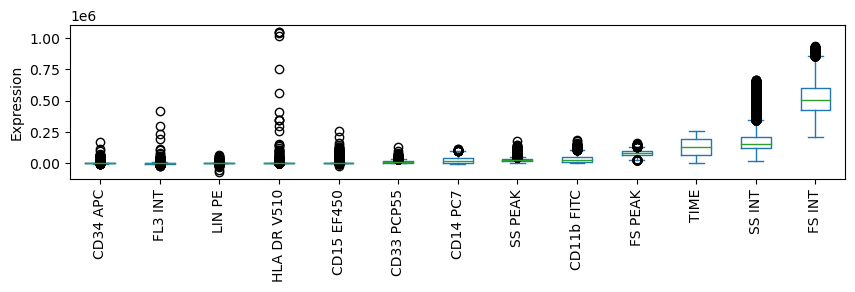

In [55]:
df = df.replace(',', '.', regex=True).apply(pd.to_numeric, errors='coerce') #pandas ne comprend pas les virgules
sort_by_mean = df.mean().sort_values(ascending=True)
df[sort_by_mean.index].plot(kind='box', figsize=(10, 2), rot=90, ylabel='Expression')

 4. Appliquer une normalisation centrée-réduite aux données

La normalisation (standardisation) centrée-réduite consiste à soustraire la moyenne et à diviser par l'écart-type les valeurs d'expression. On peut la réaliser avec l’objet StandardScaler de la librairie scikit-learn.

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Instanciation de l'objet scaler
df_scaled = scaler.fit_transform(df)  # Normalisation centrée-réduite
df_scaled = pd.DataFrame(df_scaled, index=df.index, columns=df.columns)  # Conversion en DataFrame pandas

Les valeurs d'expression sont ramenées à la même échelle après une normalisation centrée-réduite. La moyenne d’expression de chaque gène est égale à 0 et l'écart type est égal à 1.

<AxesSubplot:ylabel='Expression'>

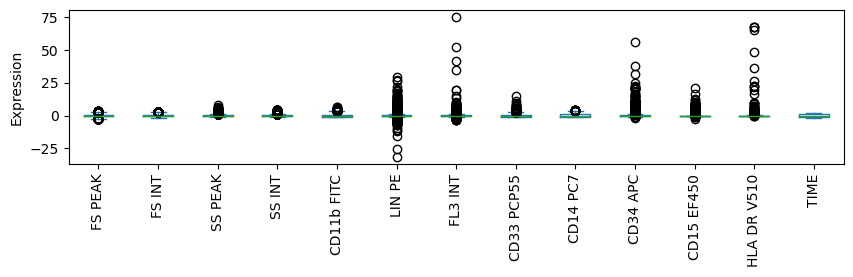

In [57]:
df_scaled.plot(kind='box', figsize=(10, 2), rot=90, ylabel='Expression')

In [58]:
import numpy as np

# Calcul des quartiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1  # Intervalle interquartile

# Détection des outliers (en dehors de [Q1 - 1.5*IQR, Q3 + 1.5*IQR])
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Extraire les lignes contenant des outliers
outlier_rows = df[outliers.any(axis=1)]
np.shape(outlier_rows)
outlier_rows  # Afficher les lignes avec des outliers

,FS PEAK,FS INT,SS PEAK,SS INT,CD11b FITC,LIN PE,FL3 INT,CD33 PCP55,CD14 PC7,CD34 APC,CD15 EF450,HLA DR V510,TIME
6,79232,465810,66928,358003,4387.455,273.37920,601.5086,780.7234,128.5094,742.75890,15718.0500,8.156952,36
8,66688,457127,29760,194579,2080.508,568.93240,1555.7060,5992.1880,-333.7597,118.19880,5107.1750,2088.277000,56
10,96848,616248,86080,587421,27488.480,1220.91900,-3409.9740,10889.9300,-1113.7960,34730.58000,44475.3700,1680.434000,97
11,62864,629444,28592,245779,19494.120,3387.72500,1100.0030,12829.0000,16516.4800,-511.05080,205.6539,1969.719000,112
12,87264,526453,62880,346926,16726.910,294.77850,-736.0176,9920.0260,-788.6499,-13.43124,25569.8700,509.032400,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25762,86368,498454,16032,94464,28520.470,1405.13000,138.3753,14149.2600,39280.0100,-1431.10700,374.3282,3773.201000,258364
25769,40496,296808,20896,142144,24253.140,1147.64700,1353.5630,15845.7800,18708.7900,77.24385,512.5753,5478.240000,258401
25771,137552,889090,31824,205551,34314.150,3480.88500,-358.2746,10363.4400,33259.0000,-1363.20300,1227.7210,1490.781000,258411
25774,85312,475760,22528,137382,8904.546,959.46190,2527.6490,8433.5820,990.1060,-137.04220,134.4149,4015.539000,258422


5. Faire une analyse en composantes principales (ACP)

Le calcul de l'ACP peut se faire à l'aide de l'objet PCA de scikit-learn.

In [59]:
from sklearn.decomposition import PCA

5.1 Calcul de l'ACP

Pour calculer une ACP, on utilise les données standardisées X_scaled.

In [92]:
pca = PCA() # instanciation de l'objet pca
df_pca = pca.fit_transform(df_scaled) # réalisation de l'ACP sur les données X_scaled

Il est plus pratique de convertir le résultat de l'ACP X_pca en dataframe pandas, en précisant les noms de colonnes : de PC1 à PC50.

In [93]:
# Conversion en dataframe pandas
pca_columns = ['PC' + str(c) for c in range(1, df_pca.shape[1]+1, 1)] # création d'une liste avec les noms de colonnes de PC1 à PC13
df_pca = pd.DataFrame(df_pca, index=df.index, columns=pca_columns) # création du dataframe
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-1.405670,2.166006,-0.157204,0.146718,0.673872,-1.583864,0.201044,-0.109667,-0.094300,0.290830,-0.134425,-0.058442,0.033297
1,-0.488997,0.309289,0.024484,0.867883,0.697577,-1.592177,0.166170,-0.002429,-0.252221,0.287798,-0.219142,-0.199998,0.072450
2,-0.675511,-2.118496,-0.128303,0.742405,1.071234,-1.435799,0.492020,1.025952,0.397219,0.097853,0.450392,-0.202187,0.013063
3,-0.926141,-2.315579,-0.428117,0.667029,0.782047,-1.584437,0.305560,-0.303583,-0.001616,0.161312,0.089525,-0.155121,0.054439
4,0.239003,0.712693,0.680003,1.693552,0.805738,-1.539950,0.725982,-0.042571,-0.316565,0.145990,0.011483,-0.331623,0.033034


5.2 Calcul de la variance expliquée

Les valeurs de la variance expliquée par composante sont disponibles dans l’attribut pca.explained_variance_ratio_ après le calcul de l'ACP.

In [94]:
pca.explained_variance_ratio_

array([0.26737449, 0.21029795, 0.09763164, 0.08551794, 0.07733562,
       0.07683904, 0.05748352, 0.0505348 , 0.035359  , 0.01809944,
       0.0116047 , 0.01023838, 0.00168349])

On peut les convertir en objet Series de pandas et présenter les valeurs en pourcentage.

In [95]:
explained_variance = pd.Series(dict(zip(df_pca.columns, 100.0*pca.explained_variance_ratio_)))
print(explained_variance.head())

PC1    26.737449
PC2    21.029795
PC3     9.763164
PC4     8.551794
PC5     7.733562
dtype: float64


<AxesSubplot:ylabel='Explained variance'>

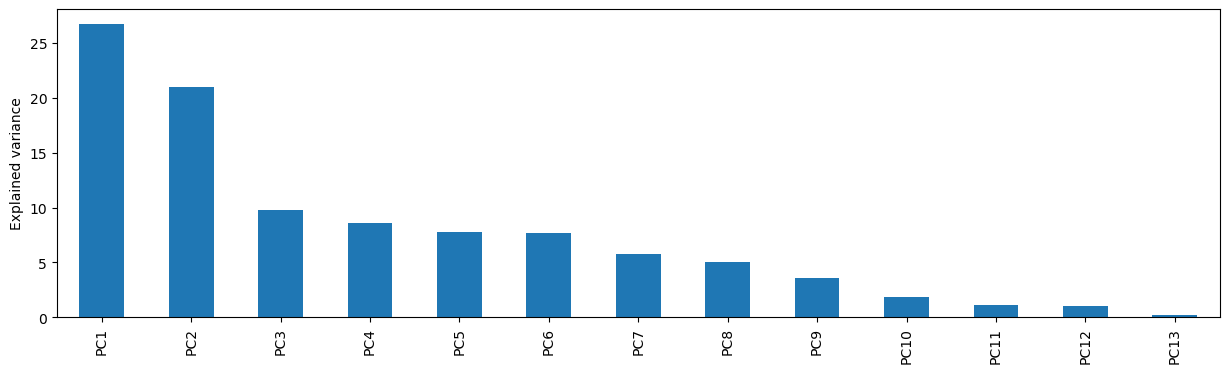

In [96]:
explained_variance.plot(kind='bar', figsize=(15, 4), rot=90, ylabel='Explained variance')

In [97]:
explained_variance['PC1'] + explained_variance['PC2']

47.767244072107474

Les deux premières composantes de l'ACP expliquent 47.8% de la variance.

In [98]:
explained_variance['PC1'] + explained_variance['PC2'] + explained_variance['PC3']

57.53040771586859

Les trois premières composantes de l'ACP expliquent 57.5% de la variance.

5.3 Visualisation des deux premières composantes principales de l’ACP

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

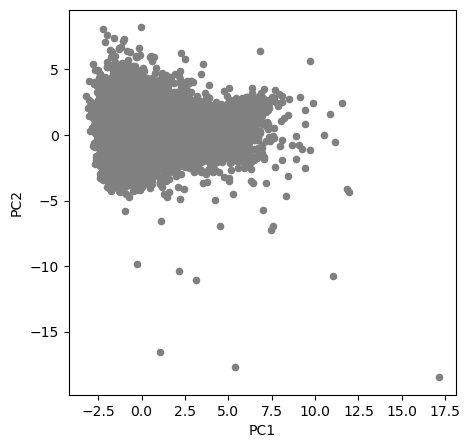

In [99]:
df_pca.plot(x='PC1', y='PC2', kind='scatter', figsize=(5, 5), color='gray')

5.4 Visualisation des trois premières composantes principales de l’ACP

Pour créer une image en 3D, on utilisera la librairie standard matplotlib de Python.

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

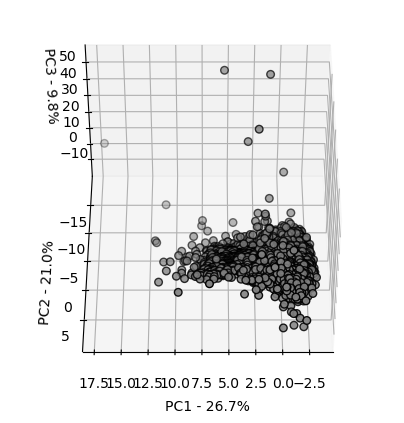

In [101]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], marker='o', s=30, edgecolor='k', color='grey')
ax.set_xlabel('PC1 - ' + '{:.1f}%'.format(explained_variance['PC1']))
ax.set_ylabel('PC2 - ' + '{:.1f}%'.format(explained_variance['PC2']))
ax.set_zlabel('PC3 - ' + '{:.1f}%'.format(explained_variance['PC3']))
ax.view_init(elev=45, azim=90)